# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\Section8.3Mini-Projects\1AnalyzeHumanBodyTemperature\EDA_human_temperature

C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\Section8.3Mini-Projects\1AnalyzeHumanBodyTemperature\EDA_human_temperature


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [65]:
df = pd.read_csv('data/human_body_temperature.csv')

In [66]:
df.head(2)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0


<div class="span5 alert alert-success">
<p> Question #1: <br>
    Is the distribution of body temperatures normal? </p>
</div>

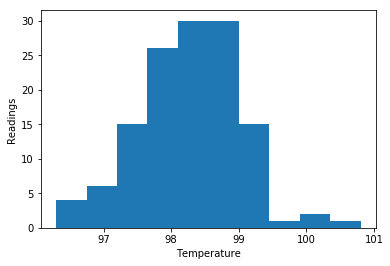

In [67]:
#Visually look for normal distribution via a histogram - based on the histogram below it appears that temperature tends
#towards a normal distribution.
_= plt.hist(df.temperature)
_= plt.xlabel('Temperature')
_= plt.ylabel('Readings')
plt.show()

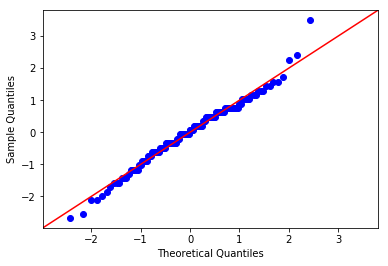

In [68]:
#Visually look for a normal distribution via a Quartile Plot - data points congregate tightly along the line
#so this data appears to be normally distributed.

mean = np.mean(df['temperature'])
sd = np.std(df['temperature'])
z = (df['temperature'] - mean) / sd
sm.qqplot(z, line='45')

plt.show()

<div class="span5 alert alert-success">
<p> Question #2: <br>
    Is the sample size large? <br>
    Are the observations independent? </p>
</div>

In [69]:
Is the sample size large?
#Since I have 130 samples, and 130 > 30, the sample size can be considered large.

Are the observations independent?
#The observations are independent because each observation is a person's body temperature. Since it is "each person",
#the body temperature of that person is not dependent on the body temperature of another person.


Object `large` not found.
Object `independent` not found.


<div class="span5 alert alert-success">
<p> Question #3: Is the true population mean really 98.6 degrees F? <br>
    a. First, try a bootstrap hypothesis test. <br><br>
    
    b. Now, let's try frequentist statistical testing: <br>
    Would you use a one-sample or two-sample test? Why? <br>
    In this situation, is it appropriate to use the t or z statistic? <br>
    Now try using the other test. How is the result different? Why?
    
</div>

In [ ]:
#Question #3 Is the true population mean really 98.6 degrees F?
#Bootstrap hypothesis test.

#Hypothesis statement: H0: u = 98.6
#Alternate hypothesis: H1: u <> 98.6

#Since the calculated p-value (see below) is 0.0 and 0 < 0.05 (95% confidence), the probability of observing the 98.6 degrees
#in the data we have is low.

In [ ]:
#3a - function used for question #3 below 
def bootstrap_replicate_1d(data,func):
    bs_sample = np.random.choice(data,size=len(data))
    return func(bs_sample)

In [ ]:
#3a - second function used for question #3 below
def draw_bs_reps(data, func, size=10000):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [ ]:
#3a - calculate p-value via bootstrapping

# Make an array of translated impact forces
temperature_translated = df.temperature - np.mean(df.temperature) + 98.6

# Take bootstrap replicates of the sample's temperatures
bs_replicates = draw_bs_reps(temperature_translated, np.mean, 10000)

# Compute fraction of replicates that are less than the observed temperature: p
p = np.sum(bs_replicates <= np.mean(df.temperature)) / 10000

# Print the p-value
print('p = ', p)

In [ ]:
#3b and 3c: Using frequentist statistical testing...

#Would you use a one-sample or two-sample test? Why?
#I would use a one-sample test because by definition the one sample test is used to determine if a sample of
#observations could have been generated by a process with a specific mean. The test is two-tailed because the hypothesis
#statement uses an equal sign.

#Would you use the t or z test
#I would use the t-test because I only have the sample std deviation, not the standard deviation of the entire population

In [ ]:
#3d: calculate p-value using the t-test
#H0: u = 98.6
#H1: u <> 98.6

In [ ]:
#ttest
mean = np.mean(df.temperature)
test_value = 98.6
sd = np.std(df.temperature)
n = df.temperature.count()
number_of_tails = 2 

t = (mean - test_value)/(sd / np.sqrt(n))
print('t-score = ' + str(stats.t.cdf(t, df = n-1) * number_of_tails))

#t = 0.0000002
#Since the t-value is 0, the probability of finding a mean of 98.6 in this sample set is low. Reject the null hypothesis.

In [ ]:
#3e: calculate p-value using the z-test

mean = np.mean(df.temperature)
test_value = 98.6
sd = np.std(df.temperature)
n = df.temperature.count()
number_of_tails = 2 

z = (mean - test_value)/(sd / np.sqrt(n))

print('z-score = ' + str(stats.norm.cdf(z) * 2))

#z = 0.00000004
#Since the z-value is 0, the p-value in the z-table is 0.  Since 0 < 0.05, the probability of finding a mean of 98.6
#in this dataset is low. Reject the null hypothesis.

<div class="span5 alert alert-success">
<p> Question #4: <br> 
Draw a small sample of size 10 from the data and repeat both frequentist tests. <br>
Which one is the correct one to use? <br>
What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic? </p>
    
</div>

In [ ]:
df_ten = df.head(10)

In [ ]:
#4 as a t-test

#H0: u = 98.6
#H1: u <> 98.6

mean = np.mean(df_ten.temperature)
test_value = 98.6
sd = np.std(df_ten.temperature)
n = df_ten.temperature.count()
number_of_tails = 2 

t = (mean - test_value)/(sd / np.sqrt(n))
print('t-score = ' + str(stats.t.cdf(t, df = n-1) * number_of_tails))

#Looking up the t-score of 0.85 with 9 degrees of freedom in the t-table gives a value of ?????? 


In [ ]:
#4 as a z-test

#H0: u = 98.6
#H1: u <> 98.6

mean = np.mean(df_ten.temperature)
test_value = 98.6
sd = np.std(df_ten.temperature)
n = df_ten.temperature.count()
number_of_tails = 2 

z = (mean - test_value)/(sd / np.sqrt(n))

print('z-score = ' + str(stats.norm.cdf(z) * 2))

#z = 0.85
#Since the z-value is 0.85, the p-value in the z-table is 0.0359 (3.5%)  Since 0.035 < 0.05, the probability of finding a mean of 98.6
#in this dataset is low. Reject the null hypothesis.


In [ ]:
#4 Which one (t-test or z-test) is the right one to use?
#Since I'm only using my sample std dev (not using the population std dev), the t-test is the right one to use.

In [ ]:
#4 What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?
#I notice that the t-test and z-test score are the same value. I'm concluding that the difference in application
#between the t-test and z-test is minimal.

<div class="span5 alert alert-success">
<p> Question #5: <br> 
At what temperature should we consider someone's temperature to be "abnormal"? <br> <br>
    
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. </p>
    
</div>

In [ ]:
#5 Given the mean of 98.6, we can consider someone's temperature abnormal in the sample when their temperature is > one
#standard deviation above or below the mean.

mean = np.mean(df.temperature)
std = np.std(df.temperature)

print('mean: ' + str(mean))
print('std: ' + str(std))
print('range for one std: ' + str(mean - std) + ' < ' + str(mean) + ' < ' + str(mean+std))


In [ ]:
#5 Margin of error formula is sqrt(p(1-p)/samplesize)
count_over = df.temperature[df.temperature > 98.5].count()
total_count = df.temperature.count()

p = count_over/total_count
print('percent of sample with abnormal temperature: ' + str(p))

margin_of_error = np.sqrt(0.38 * (1-0.38)/130)
print('margin of error: ' + str(margin_of_error))

<div class="span5 alert alert-success">
<p> Question #6: <br> 
Is there a significant difference between males and females in normal temperature? <br> <br>
    
What testing approach did you use and why? <br>
Write a story with your conclusion in the context of the original problem.
    
</div>

In [ ]:
#6 Determine the mean temperature of males and females in the sample data set.

df_f = df.temperature[df.gender == 'F']
df_m = df.temperature[df.gender == 'M']

f_mean = np.mean(df.temperature[df.gender == 'F'])
m_mean = np.mean(df.temperature[df.gender == 'M'])

print('percent females: ' + str(f_mean))
print('percent males: ' + str(m_mean))

In [ ]:
#6 Complete a difference of means test on the hypothesis below to determine the probability that females
#have higher temperatures than males

#The observed difference of means in the sample data is that females' mean temperature is 0.29 (98.39 - 98.10) > than males.

#Hypothesis:
#H0: f > 0.29
#H1: f <= 0.29
    
# Compute the difference of the sample means: mean_diff
mean_diff = f_mean - m_mean

# Get bootstrap replicates of means
bs_replicates_m = draw_bs_reps(df_m, np.mean, 10000)
bs_replicates_f = draw_bs_reps(df_f, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_f - bs_replicates_m

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')


In [ ]:
#I used the difference of means testing approach
#This bootstrapping exercise resulted in a 0.29 difference of means; which is the same value as the original sample.

#We're 95% confident that within the sample data, a given female and males temperature will vary within a range
#of 0.24 to 0.82.

#The story is that within this sample we can be 95% confident that a given female and male's temperature will vary 
#by a range of 0.24 to 0.82 and trend toward a mean difference of 0.24.